In [1]:
print("HELLO WORLD ")

HELLO WORLD 


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
df = pd.read_csv("sample_101_heart_failure_clinical_records_dataset.csv")

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       100 non-null    int64  
 1   anaemia                   100 non-null    int64  
 2   creatinine_phosphokinase  100 non-null    int64  
 3   diabetes                  100 non-null    int64  
 4   ejection_fraction         100 non-null    int64  
 5   high_blood_pressure       100 non-null    int64  
 6   platelets                 100 non-null    float64
 7   serum_creatinine          100 non-null    float64
 8   serum_sodium              100 non-null    int64  
 9   sex                       100 non-null    int64  
 10  smoking                   100 non-null    int64  
 11  time                      100 non-null    int64  
 12  DEATH_EVENT               100 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 10.3 KB


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

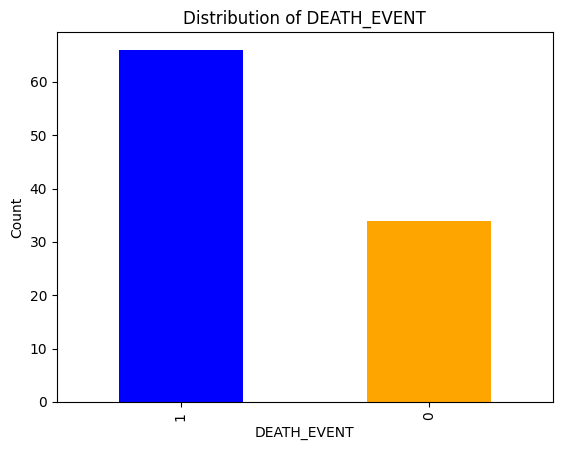

In [10]:
df["DEATH_EVENT"].value_counts().plot(kind='bar',color=['blue', 'orange'], title='Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')     
plt.show()

In [11]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [18]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)*100 :.2f}%")

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.75      1.00      0.86        12

    accuracy                           0.80        20
   macro avg       0.88      0.75      0.76        20
weighted avg       0.85      0.80      0.78        20

[[ 4  4]
 [ 0 12]]
0.8
Model Accuracy: 80.00%
